In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-70.46747898171377 -138.1228117579755
8.76148691872632 133.59647063659492
-36.63907325670388 161.9952904562105
-46.98541236987752 106.25391138783095
-67.1747023254598 79.58167746596183
-50.732414926529955 -100.50405574506007
-31.534762811343 149.4307401905653
43.91800128799326 46.19179886662519
-4.92907198442802 -87.48979351150021
-51.872672887910504 -163.58167986458113
74.82642699615434 39.38267549009112
48.569736826781394 -7.218874807923385
-13.204793874732488 -31.607780971679603
-16.380984970712433 -4.630228565352752
-49.881337434207275 73.58850226420986
12.647297671519212 -2.8172311037430973
18.813249870508287 64.66434337962605
36.79759418647187 37.984184432354596
-42.79340614616237 -28.187565876945
62.2336942697917 -134.03565687089468
-74.69156394310016 -37.447772462020026
20.93200550428955 92.23943427765056
-3.8231971606113007 -164.14425364892142
-44.319956190399054 121.91455158538957
-53.958871047235654 -116.84497260779102
76.87009148840087 122.35103891961529
-28.5698971367489 -

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

625

In [7]:
#Import requests library
import requests

#import the weather api key
from config import weather_api_key

In [8]:
#Creatnig a basic url
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | meyungs
City not found. Skipping...
Processing Record 3 of Set 1 | port macquarie
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | castro
Processing Record 6 of Set 1 | mudgee
Processing Record 7 of Set 1 | kargalinskaya
Processing Record 8 of Set 1 | san cristobal
Processing Record 9 of Set 1 | avarua
Processing Record 10 of Set 1 | ostrovnoy
Processing Record 11 of Set 1 | penzance
Processing Record 12 of Set 1 | maceio
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | souillac
Processing Record 15 of Set 1 | reo
Processing Record 16 of Set 1 | dwarka
Processing Record 17 of Set 1 | birecik
Processing Record 18 of Set 1 | arraial do cabo
Processing Record 19 of Set 1 | whitehorse
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | teknaf
Processing Record 22 of Set 1 | samusu
City not found

Processing Record 38 of Set 4 | sioux lookout
Processing Record 39 of Set 4 | leeuwarden
Processing Record 40 of Set 4 | chuy
Processing Record 41 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 42 of Set 4 | contamana
Processing Record 43 of Set 4 | bargal
City not found. Skipping...
Processing Record 44 of Set 4 | east london
Processing Record 45 of Set 4 | bethlehem
Processing Record 46 of Set 4 | ulverstone
Processing Record 47 of Set 4 | amderma
City not found. Skipping...
Processing Record 48 of Set 4 | sola
Processing Record 49 of Set 4 | torun
Processing Record 50 of Set 4 | camocim
Processing Record 1 of Set 5 | asosa
Processing Record 2 of Set 5 | carnarvon
Processing Record 3 of Set 5 | natal
Processing Record 4 of Set 5 | deh rawud
City not found. Skipping...
Processing Record 5 of Set 5 | santa lucia
Processing Record 6 of Set 5 | esso
Processing Record 7 of Set 5 | richards bay
Processing Record 8 of Set 5 | bulungu
Processing Record 9 of Set 5 | hun
Pro

Processing Record 24 of Set 8 | sorvag
City not found. Skipping...
Processing Record 25 of Set 8 | ler
Processing Record 26 of Set 8 | sibolga
Processing Record 27 of Set 8 | huancavelica
Processing Record 28 of Set 8 | vilcun
Processing Record 29 of Set 8 | puerto ayora
Processing Record 30 of Set 8 | kalemie
Processing Record 31 of Set 8 | hobyo
Processing Record 32 of Set 8 | moussoro
Processing Record 33 of Set 8 | muroto
Processing Record 34 of Set 8 | surt
Processing Record 35 of Set 8 | diego de almagro
Processing Record 36 of Set 8 | port hardy
Processing Record 37 of Set 8 | sur
Processing Record 38 of Set 8 | dourbali
Processing Record 39 of Set 8 | saldanha
Processing Record 40 of Set 8 | coihaique
Processing Record 41 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 42 of Set 8 | bermejo
Processing Record 43 of Set 8 | hofn
Processing Record 44 of Set 8 | hillsborough
Processing Record 45 of Set 8 | flinders
Processing Record 46 of Set 8 | pacific grove
Proc

Processing Record 10 of Set 12 | maniitsoq
Processing Record 11 of Set 12 | caluquembe
Processing Record 12 of Set 12 | dumas
Processing Record 13 of Set 12 | aromashevo
Processing Record 14 of Set 12 | cockburn town
Processing Record 15 of Set 12 | broken hill
Processing Record 16 of Set 12 | price
Processing Record 17 of Set 12 | waterbury
Processing Record 18 of Set 12 | nuuk
Processing Record 19 of Set 12 | utiroa
City not found. Skipping...
Processing Record 20 of Set 12 | sarahan
Processing Record 21 of Set 12 | santiago del estero
Processing Record 22 of Set 12 | rio grande
Processing Record 23 of Set 12 | okhotsk
Processing Record 24 of Set 12 | tuatapere
Processing Record 25 of Set 12 | kununurra
Processing Record 26 of Set 12 | cabras
Processing Record 27 of Set 12 | comodoro rivadavia
Processing Record 28 of Set 12 | prince rupert
Processing Record 29 of Set 12 | dunedin
Processing Record 30 of Set 12 | inderborskiy
City not found. Skipping...
Processing Record 31 of Set 12 

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,76.08,70,32,7.47,PF,2022-11-28 01:49:25
1,Port Macquarie,-31.4333,152.9167,71.76,77,30,14.99,AU,2022-11-28 01:45:06
2,Busselton,-33.6500,115.3333,70.00,41,0,9.31,AU,2022-11-28 01:49:26
3,Castro,-24.7911,-50.0119,59.02,97,99,10.02,BR,2022-11-28 01:49:26
4,Mudgee,-32.5943,149.5871,75.78,37,0,11.21,AU,2022-11-28 01:49:26
5,Kargalinskaya,43.7417,46.4792,43.83,78,100,5.75,RU,2022-11-28 01:49:27
6,San Cristobal,7.7669,-72.2250,68.18,98,100,2.28,VE,2022-11-28 01:49:27
7,Avarua,-21.2078,-159.7750,80.65,65,75,17.27,CK,2022-11-28 01:49:27
8,Ostrovnoy,68.0531,39.5131,25.30,86,100,23.02,RU,2022-11-28 01:49:28
9,Penzance,50.1186,-5.5371,52.48,77,10,26.84,GB,2022-11-28 01:49:28


In [13]:
new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df=city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2022-11-28 01:49:25,-23.1203,-134.9692,76.08,70,32,7.47
1,Port Macquarie,AU,2022-11-28 01:45:06,-31.4333,152.9167,71.76,77,30,14.99
2,Busselton,AU,2022-11-28 01:49:26,-33.6500,115.3333,70.00,41,0,9.31
3,Castro,BR,2022-11-28 01:49:26,-24.7911,-50.0119,59.02,97,99,10.02
4,Mudgee,AU,2022-11-28 01:49:26,-32.5943,149.5871,75.78,37,0,11.21


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


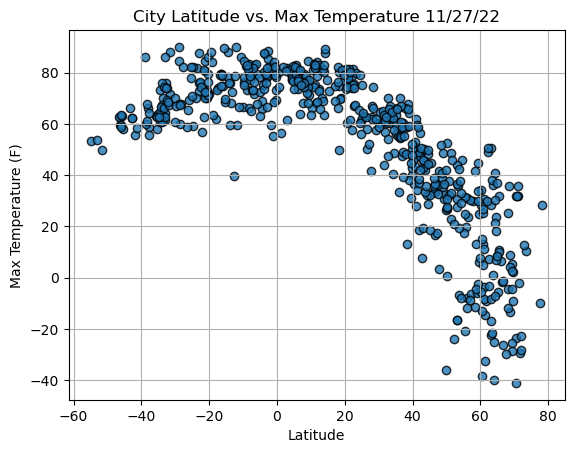

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

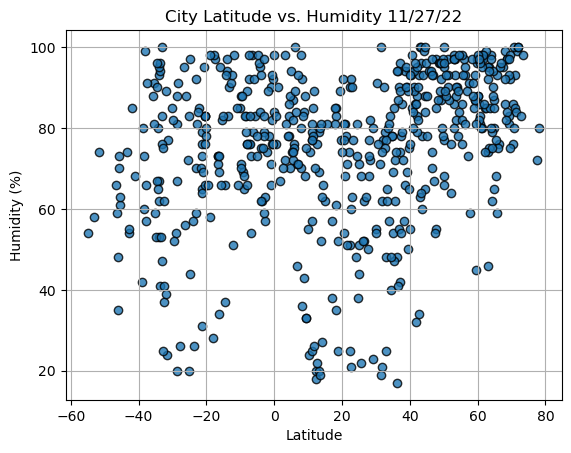

In [22]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

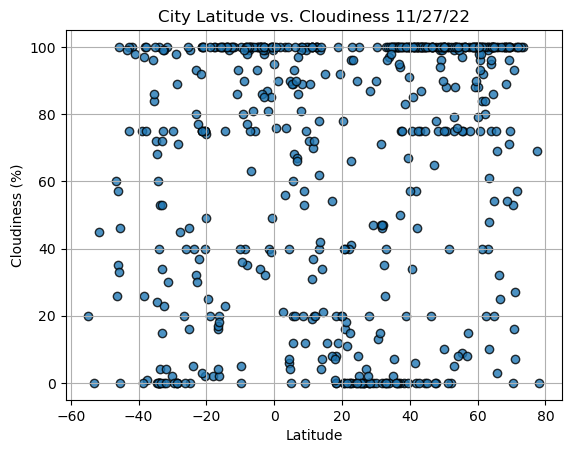

In [23]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

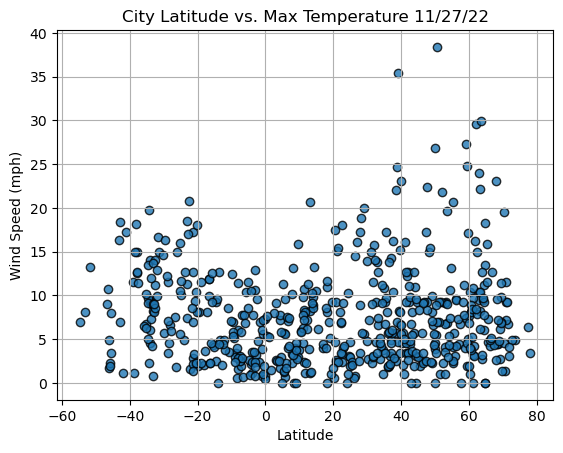

In [24]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()